In [2]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA
from sklearn import datasets

In [3]:
dataset=datasets.load_iris()

In [4]:
X=dataset['data']
y=dataset['target']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()

In [8]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [9]:
pca=PCA(n_components=3)
pca

PCA(n_components=3)

In [10]:
X_train_scaled=pca.fit_transform(X_train_scaled)
X_train_scaled

array([[ 1.80806614e-01, -2.89949359e-01,  1.33781908e-01],
       [ 2.75947391e+00,  7.94235451e-01, -6.02767255e-01],
       [ 3.17594511e-01, -9.45982904e-02,  4.70709135e-01],
       [-2.32440574e+00,  7.19534192e-01, -1.46453582e-01],
       [ 2.89034253e+00,  3.83181790e-01, -8.82206238e-01],
       [ 9.05159418e-02, -7.14099562e-01, -3.31353421e-01],
       [-2.20600792e+00,  5.37801954e-01, -2.90454426e-01],
       [-2.34527922e+00,  6.82952398e-01,  1.88853139e-02],
       [-2.16615986e+00,  1.40565078e+00,  2.32083009e-01],
       [-2.35861703e-01, -2.62064130e+00, -7.84775552e-02],
       [ 1.29215434e+00, -4.51285945e-01, -2.33220394e-02],
       [-2.28947676e+00,  3.72071435e-01,  9.34989662e-02],
       [-2.04476529e+00, -4.40595361e-01, -3.30292923e-01],
       [-1.88267168e+00,  2.91543549e-01,  1.79908489e-02],
       [ 2.27401497e-01, -7.79670305e-01,  1.06632621e-01],
       [-2.23538174e+00,  4.96238752e-01, -1.96273587e-01],
       [ 4.92558369e-02, -7.21576139e-02

In [11]:
X_test_scaled=pca.transform(X_test_scaled)
X_test_scaled

array([[ 5.82984149e-01, -3.48839671e-01, -3.20539279e-01],
       [-1.93036442e+00,  1.65109316e+00, -3.89700002e-01],
       [ 3.29805015e+00, -4.53311410e-02, -7.24991845e-01],
       [ 6.26193088e-01, -1.50074060e-01,  6.58558914e-02],
       [ 1.21391877e+00, -4.16669887e-02, -7.50728572e-01],
       [-1.89207456e+00,  6.34547188e-01, -2.85889719e-01],
       [-8.67522394e-02, -3.35168577e-01,  1.77352478e-01],
       [ 1.90338449e+00,  7.27672396e-01,  1.25724083e-01],
       [ 1.13797657e+00, -1.63262718e+00, -5.07396014e-01],
       [ 1.75569492e-01, -7.03092172e-01, -1.74577229e-01],
       [ 1.36512629e+00,  7.65070216e-01,  2.73722924e-01],
       [-2.31617187e+00, -5.31836900e-01, -2.56469534e-01],
       [-2.10483116e+00,  8.87353863e-01, -5.01486821e-01],
       [-2.27374275e+00, -2.65411394e-01, -2.79140252e-01],
       [-2.37881880e+00,  1.39753565e+00,  1.17544721e-01],
       [ 7.41009650e-01,  8.78523881e-01,  1.33281876e-01],
       [ 1.86641288e+00,  3.33142743e-01

In [12]:
pca.components_

array([[ 0.52697587, -0.22992601,  0.58779558,  0.56914569],
       [ 0.34980992,  0.93570534,  0.00902236,  0.04480103],
       [-0.72272541,  0.23850671,  0.12489656,  0.63654017]])

In [13]:
pca.explained_variance_ratio_

array([0.71201434, 0.23965364, 0.04316046])

In [15]:
pca.explained_variance_,pca.n_components

(array([2.8768256 , 0.96829755, 0.17438569]), 3)

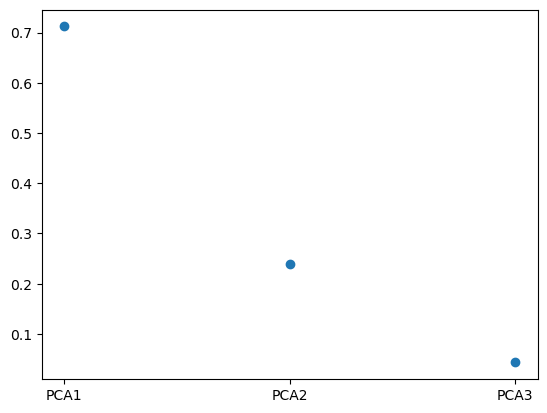

In [16]:
plt.scatter(['PCA1','PCA2','PCA3'],pca.explained_variance_ratio_)

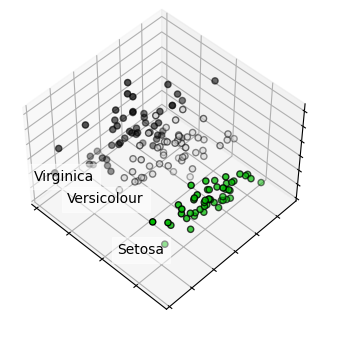

In [17]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn import decomposition
from sklearn import datasets

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

In [18]:
from sklearn.cluster import KMeans

In [19]:
## Elbow method to select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

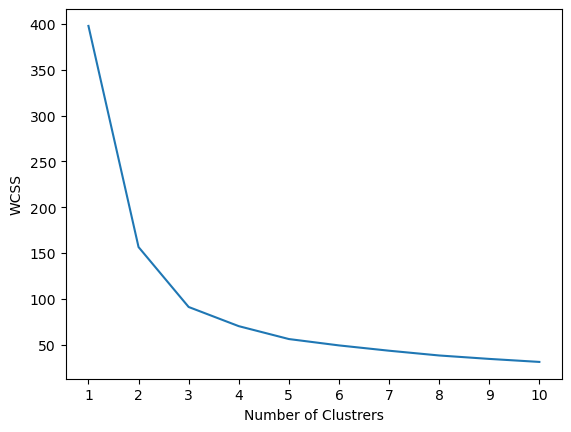

In [20]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [21]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [22]:
y_labels=kmeans.fit_predict(X_train_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


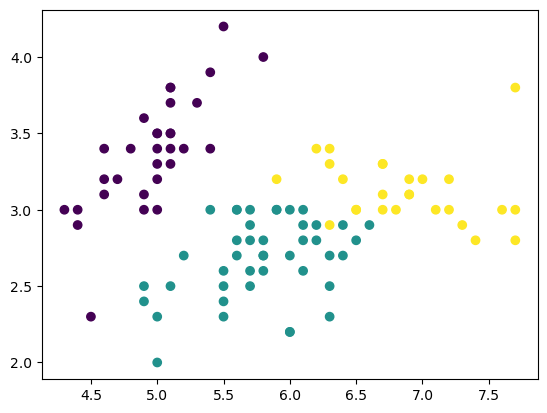

In [23]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [24]:
y_labels

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0,
       1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1,
       2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2], dtype=int32)

In [25]:
# There three types of output/Clusters

## Silhoutte score
from sklearn.metrics import silhouette_score

In [26]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [27]:
silhouette_coefficients

[0.5707803262573641,
 0.487046077810976,
 0.4360723553957979,
 0.3806890979449386,
 0.3723372195134218,
 0.3402437633510389,
 0.34800317036583545,
 0.34449565669581966,
 0.33786641942416196]

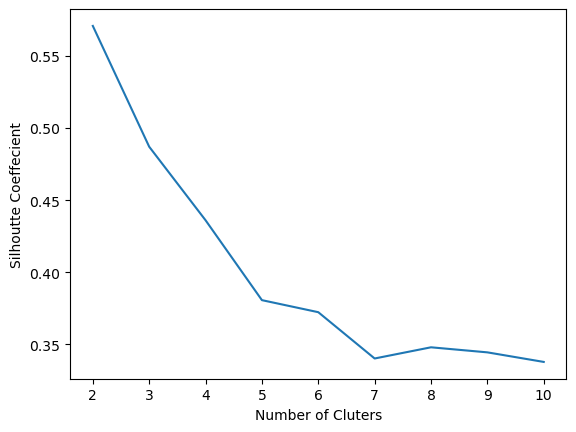

In [28]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()